In [ ]:
pip install sdv

     |████████████████████████████████| 103 kB 6.5 MB/s 
     |████████████████████████████████| 1.2 MB 41.5 MB/s 
     |████████████████████████████████| 45 kB 2.0 MB/s 
     |████████████████████████████████| 97 kB 4.1 MB/s 
     |████████████████████████████████| 46 kB 2.7 MB/s 
     |████████████████████████████████| 52 kB 382 kB/s 
     |████████████████████████████████| 38.1 MB 12.1 MB/s 
     |████████████████████████████████| 11.2 MB 23.4 MB/s 
     |████████████████████████████████| 930 kB 40.5 MB/s 
     |████████████████████████████████| 636 kB 39.1 MB/s 
     |████████████████████████████████| 280 kB 39.5 MB/s 
     |████████████████████████████████| 2.5 MB 32.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting u

In [ ]:
!git clone https://github.com/JkbRnc/Data_Generators.git

Cloning into 'Data_Generators'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 117 (delta 36), reused 94 (delta 25), pack-reused 0
Receiving objects: 100% (117/117), 1.09 MiB | 1.98 MiB/s, done.
Resolving deltas: 100% (36/36), done.


# Imports

In [ ]:
from Data_Generators.evaluate.eval import create_statistics, evaluate_randomforest, evaluate_knn, distance

In [ ]:
from sdv.tabular import TVAE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Extra functions

In [ ]:
def create_statistics_(data, target_column, model, categorical_columns = [], k = 100, classification=False, method='randomforest', sample_size=10000):
  model.fit(data)
  model_score = []
  test_score = []
  for _ in range(k):
    samples_df = model.sample(sample_size)
    
    if method == 'randomforest':
      x, y = evaluate_randomforest(data, samples_df, target_column=target_column, classification=classification)
    else:
      x, y = evaluate_knn(data, samples_df, target_column=target_column, classification=classification)
    model_score.append(x)
    test_score.append(y)
  return np.array(model_score), np.array(test_score)

# Real estate dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/real_estate.csv'
real_estate = pd.read_csv(url, sep=',')

In [ ]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
model = TVAE(compress_dims=[512, 512], decompress_dims=[512, 512])

In [ ]:
model.fit(real_estate)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

In [ ]:
samples = model.sample(10000)

In [ ]:
samples.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,244,2012.849,32.2,370.77755,7,24.96429,121.54079,41.4
1,414,2013.488,11.2,399.03003,6,24.97770,121.53588,42.5
2,413,2013.525,4.3,319.11613,5,24.98065,121.53923,44.7
3,62,2013.472,18.0,1443.89229,3,24.97468,121.54282,54.8
4,303,2012.997,34.6,297.48679,1,24.96133,121.53766,44.0


<AxesSubplot:>

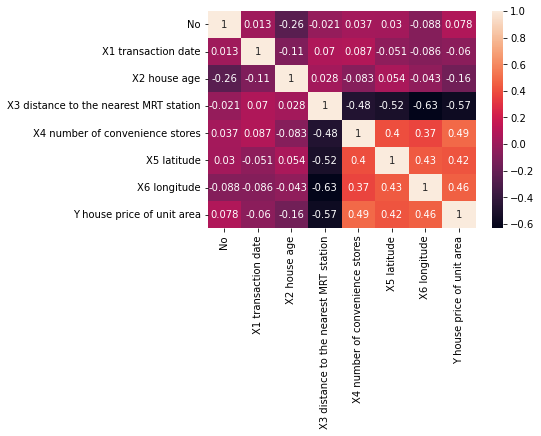

In [ ]:
sn.heatmap(samples.corr(), annot=True)

<AxesSubplot:>

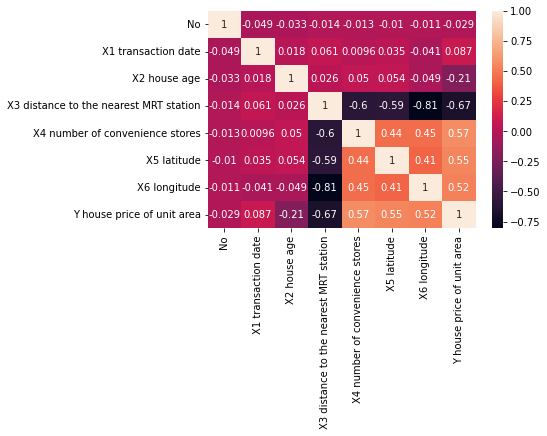

In [ ]:
sn.heatmap(real_estate.corr(), annot=True)

In [ ]:
distance(real_estate.corr(), samples.corr())

0.010952289124223703

In [ ]:
model = TVAE(compress_dims=[512, 512], decompress_dims=[512, 512])
x, y = create_statistics_(data=real_estate, categorical_columns=['Y house price of unit area'], target_column='Y house price of unit area', model=model, sample_size=real_estate.shape[0])

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

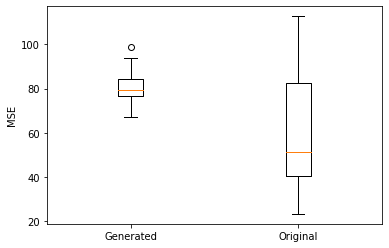

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([x, y])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
x.mean()

80.28650431043478

In [ ]:
y.mean()

58.232165796826905

In [ ]:
model = TVAE(compress_dims=[512, 512], decompress_dims=[512, 512], epochs=600)
x, y = create_statistics_(data=real_estate, categorical_columns=['Y house price of unit area'], target_column='Y house price of unit area', model=model, method='knn')

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

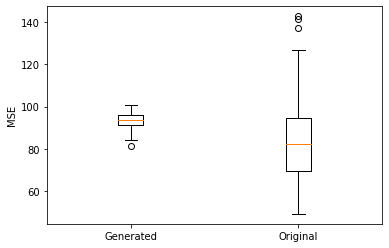

In [ ]:
plt.ylabel('MSE')
bp = plt.boxplot([x, y])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
x.mean()

93.56632583574881

In [ ]:
y.mean()

85.94470634615385

In [ ]:
samples = model.sample(10000)

In [ ]:
distance(real_estate.corr(), samples.corr())

0.0072618838907097215

# Dry bean dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/dry_bean.csv'
beans = pd.read_csv(url, sep=';')

In [ ]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
beans_tvae = TVAE()

In [ ]:
beans_tvae.fit(beans)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

In [ ]:
samples = beans_tvae.sample(10000)

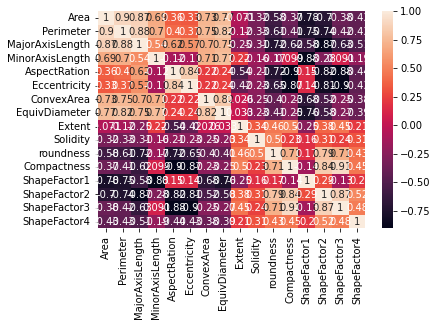

In [ ]:
sn.heatmap(samples.drop(['Class'], axis=1).corr(), annot=True)
plt.show()

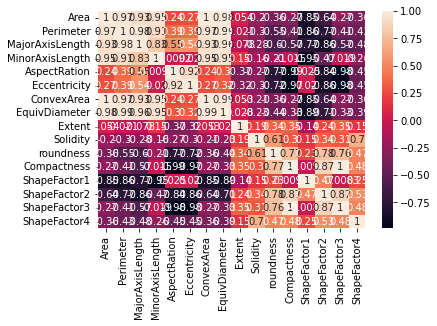

In [ ]:
sn.heatmap(beans.corr(), annot=True)
plt.show()

In [ ]:
distance(beans.corr(), samples.corr())

0.006953119292332631

In [ ]:
model=TVAE()
data1, data2 = create_statistics_(beans, 'Class', model=model, classification=True)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

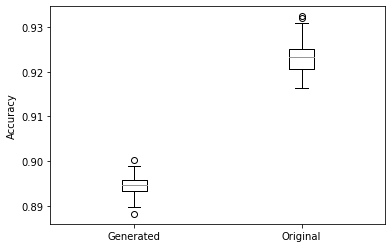

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.8944809345382412

In [ ]:
data2.mean()

0.9232089332941523

In [ ]:
model=TVAE()
data1, data2 = create_statistics_(beans, 'Class', model=model, classification=True, method='knn')

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

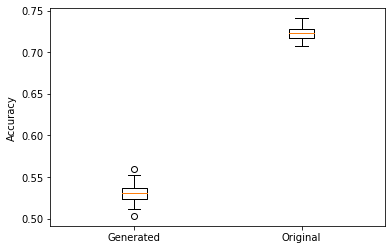

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.5302887370509146

# Breast cancer

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/breast_cancer.csv'
bc =  pd.read_csv(url, sep=',')

In [ ]:
model = TVAE(compress_dims=[512, 512], decompress_dims=[512, 512])
data1, data2 = create_statistics_(bc, 'Classification', model, ['Classification'],classification=True)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_nam

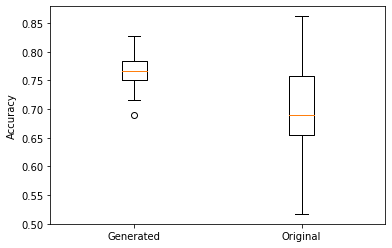

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.7688793103448276

In [ ]:
model = TVAE(compress_dims=[512, 512], decompress_dims=[512, 512])
data1, data2 = create_statistics_(bc, 'Classification', model, ['Classification'],classification=True, method='knn')

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

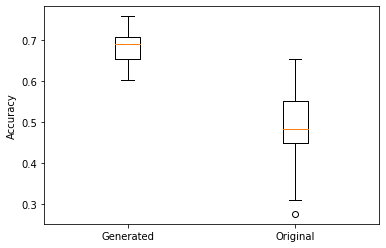

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.6863793103448278

In [ ]:
samples = model.sample(10000)

<AxesSubplot:>

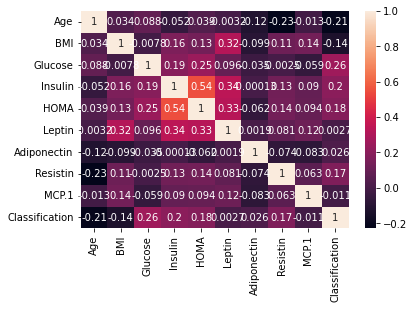

In [ ]:
sn.heatmap(samples.corr(), annot=True)

In [ ]:
distance(bc.corr(), samples.corr())

0.015877487621109555

# WSNs dataset

In [ ]:
url = 'https://raw.githubusercontent.com/JkbRnc/Data_Generators/main/datasets/wsns.csv'
wsns = pd.read_csv(url, sep=',')

In [ ]:
wsns = wsns.drop(['sd_ale'], axis=1)

In [ ]:
wsns.head()

,anchor_ratio,trans_range,node_density,iterations,ale
0,30,15,200,40,0.773546
1,15,15,100,70,0.911941
2,30,15,100,50,0.814867
3,15,20,100,20,1.435332
4,30,15,100,40,1.265909


In [ ]:
model = TVAE(compress_dims=[512, 512], decompress_dims=[512, 512])
data1, data2 = create_statistics_(wsns, 'ale', model, classification=False)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

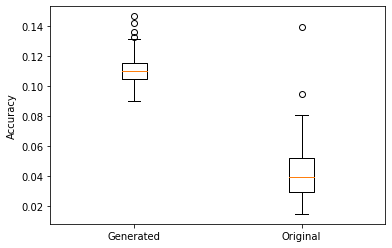

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.11084319812646826

In [ ]:
model = TVAE(compress_dims=[512, 512], decompress_dims=[512, 512])
data1, data2 = create_statistics_(wsns, 'ale', model, classification=False, method='knn')

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:146: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ctgan/data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

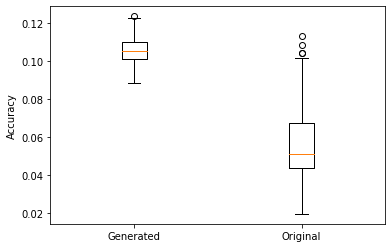

In [ ]:
plt.ylabel('Accuracy')
bp = plt.boxplot([data1, data2])
plt.xticks([1, 2], ['Generated', 'Original'])
plt.show()

In [ ]:
data1.mean()

0.1058856015882078

In [ ]:
samples = model.sample(10000)
distance(wsns.corr(), samples.corr())

0.030043321135790117